# Machine Learning Fundamentals
## Hesus Garcia Cobos
### Lección 2 - Regresión parte 1
## Regresión lineal múltiple


In [89]:
import numpy as np # Para manejar matrices
import pandas as pd # Para leer y explorar datos
import matplotlib.pyplot as plt # Para dibujar

from sklearn.linear_model import LinearRegression # Modelo de regresión lineal
from sklearn.preprocessing import StandardScaler # Escalador estandar
from sklearn.pipeline import Pipeline # Constructor de Pipelines
from sklearn.model_selection import train_test_split # divide y permuta el dataset
from sklearn.preprocessing import PolynomialFeatures # Mapeo polinomial



from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [144]:
import warnings
warnings.filterwarnings('ignore')

Se lee el archivo de las casas

In [90]:
url = 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/ReconocimientoPatrones/master/Datasets/home_data.csv'
df = pd.read_csv(url,parse_dates=[0])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Se eligen las variables

In [91]:
#x = np.asanyarray(df.drop(columns=['id','date','price','zipcode']))
x = np.asanyarray(df.drop(columns=['id','date','price']))
y = np.asanyarray(df[['price']])
print(x.shape, y.shape)

(21613, 18) (21613, 1)


Se entrena el modelo

In [92]:
model = LinearRegression()
model.fit(x, y)
print('Train: ', model.score(x, y))

Train:  0.6997471876839377


Se crean dos conjuntos de datos, uno para entrenar y otro para probar

In [93]:
# Split the data into a training set and a test set
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [94]:
len(x_train), len(y_train)

(16209, 16209)

In [95]:
len(x_test), len(y_test)

(5404, 5404)

In [97]:
# Definir grado del mapeo polinomico
d = 2
model = Pipeline([
          ('poly_features', PolynomialFeatures(degree=d, include_bias=False)),
          ('scaler', StandardScaler()),
          ('Regressor', LinearRegression())])
model.fit(x_train, y_train)


print('Train: ', model.score(x_train,y_train))
print('Test: ', model.score(x_test, y_test))

Train:  0.8315316224669166
Test:  0.8153348034452199


In [99]:
model = Pipeline([
                  ('scaler', StandardScaler()),
                  ('Regressor', LinearRegression())])
model.fit(x, y)
print('Train: ', model.score(x, y))

Train:  0.6997471876839377


## Explicación de variables con regresión lineal
Se extraen los coheficientes

In [100]:
labels = list(df.drop(columns=['id','date','price']).columns)
coeff = list(model.named_steps['Regressor'].coef_[0])
coeff = coeff / np.linalg.norm(coeff)
print(labels)
print(coeff)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
[-0.1522137   0.1449964   0.37436456  0.02437329  0.016529    0.23078444
  0.18539192  0.07856739  0.51576007  0.34916523  0.12357486 -0.3521743
  0.03641543 -0.14259219  0.38216458 -0.13837175  0.06799718 -0.04780646]


Se crea un nuevo dataframe

In [101]:
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
print(features)

               importance  positive
Features                           
yr_built        -0.352174     False
bedrooms        -0.152214     False
zipcode         -0.142592     False
long            -0.138372     False
sqft_lot15      -0.047806     False
floors           0.016529      True
sqft_lot         0.024373      True
yr_renovated     0.036415      True
sqft_living15    0.067997      True
condition        0.078567      True
sqft_basement    0.123575      True
bathrooms        0.144996      True
view             0.185392      True
waterfront       0.230784      True
sqft_above       0.349165      True
sqft_living      0.374365      True
lat              0.382165      True
grade            0.515760      True


Se dibujan las variables

Text(0.5, 1.0, 'Variable importance')

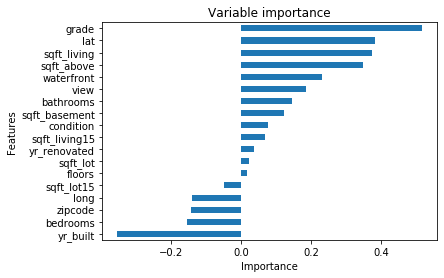

In [102]:
features.importance.plot(kind='barh')
plt.xlabel('Importance')
plt.title('Variable importance')

In [162]:
#x = np.asanyarray(df.drop(columns=['id','date','price','zipcode']))
new_x = np.asanyarray(df.drop(columns=['id','date','price', 'yr_built', 'zipcode', 'sqft_lot15', 'bedrooms', 'long', 'floors']))
new_y = np.asanyarray(df[['price']])
print(new_x.shape, new_y.shape)

(21613, 12) (21613, 1)


In [163]:
# Split the data into a training set and a test set
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, random_state=0)

In [169]:
# Definir grado del mapeo polinomico
d = 3
model = Pipeline([
          ('poly_features', PolynomialFeatures(degree=d, include_bias=False)),
          ('scaler', StandardScaler()),
          ('Regressor', LinearRegression())])
model.fit(x_train, y_train)



print('Train: ', model.score(x_train,y_train))
print('Test: ', model.score(x_test, y_test))

Train:  0.8421215156796309
Test:  0.8071770542673025


In [172]:
from sklearn.linear_model import Ridge
d = 3
model = Pipeline([
  ('poly', PolynomialFeatures(degree=d, include_bias=False)),
  ('scaler', StandardScaler()),
  ('Regressor', Ridge(alpha=2))])

model.fit(x_train, y_train)


model.fit(x_train, y_train)
print('Train: ', model.score(x_train, y_train))
print('Test: ', model.score(x_test, y_test))

Train:  0.7947468847921964
Test:  0.7628310917292711


In [175]:

from sklearn.linear_model import Lasso
d = 3
model = Pipeline([
  ('poly', PolynomialFeatures(degree=d, include_bias=False)),
  ('scaler', StandardScaler()),
  ('Regressor', Lasso(alpha=0.001))])

model.fit(x_train, y_train)


model.fit(x_train, y_train)
print('Train: ', model.score(x_train, y_train))
print('Test: ', model.score(x_test, y_test))

Train:  0.7878908468151274
Test:  0.7603124076524121


In [45]:
model = LinearRegression()

In [46]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Regresión polinomoal
Se crean unos datos sinteticos oara entender la regresión polinomial

[-3, 3, 0, 10]

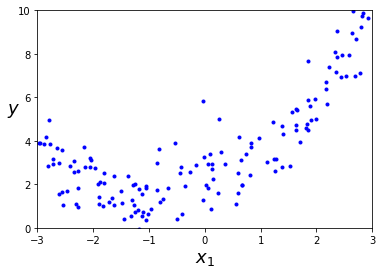

In [41]:
np.random.seed(42)
m = 150
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

Se aplica una regresión lineal

Train:  0.8341495167619667


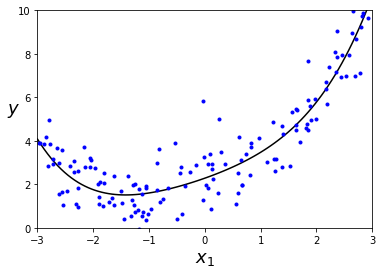

In [42]:
# Definir grado del mapeo polinomico
d = 5
model = Pipeline([
          ('poly_features', PolynomialFeatures(degree=d, include_bias=False)),
          ('std_scaler', StandardScaler()),
          ('lin_reg', LinearRegression())])
model.fit(x,y)

# Crear nuevos puntos para dibujar puntos
xnew=np.linspace(-3, 3, 100).reshape(100, 1)
ynew = model.predict(xnew)
plt.plot(xnew,ynew,'-k')

# Dibujar datos
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

print('Train: ', model.score(x,y))

## Sobreentrenamiento y subentrenamiento

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(112, 1) (38, 1) (112, 1) (38, 1)


Train:  0.8946125265150975
Test:  -5855960023366.4


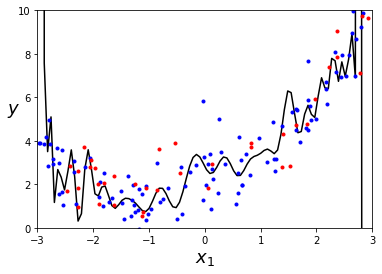

In [16]:
# Definir grado del mapeo polinomico
d = 100
model = Pipeline([
          ('poly_features', PolynomialFeatures(degree=d, include_bias=False)),
          ('std_scaler', StandardScaler()),
          ('lin_reg', LinearRegression())])
model.fit(xtrain, ytrain)

# Crear nuevos puntos para dibujar puntos
xnew=np.linspace(-3, 3, 100).reshape(100, 1)
ynew = model.predict(xnew)
plt.plot(xnew,ynew,'-k')

# Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

print('Train: ', model.score(xtrain,ytrain))
print('Test: ', model.score(xtest, ytest))

## Regularización
Se utiliza el método de Ridge, que es una regresión lineal regularizada con L2

Train:  0.8354579771055644
Test:  0.8103722024331894


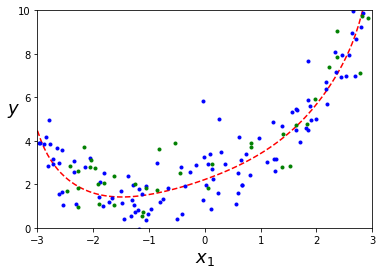

In [17]:
from sklearn.linear_model import Ridge
d = 20
model = Pipeline([
  ('poly', PolynomialFeatures(degree=d, include_bias=False)),
  ('scaler', StandardScaler()),
  ('Regressor', Ridge(alpha=2))])

model.fit(xtrain, ytrain)

# Crear nuevos puntos para dibujar puntos
xnew=np.linspace(-3, 3, 100).reshape(100, 1)
ynew = model.predict(xnew)
plt.plot(xnew,ynew,'--r')

# Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "g.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

model.fit(xtrain, ytrain)
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

Se puede usar la norma L1 también, en la técnica es conocida como Lasso

C:\Users\aldac\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.001624411113, tolerance: 0.0674359748539385
  positive)
C:\Users\aldac\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.001624411113, tolerance: 0.0674359748539385
  positive)


Train:  0.8383736428639003
Test:  0.8148340758714152


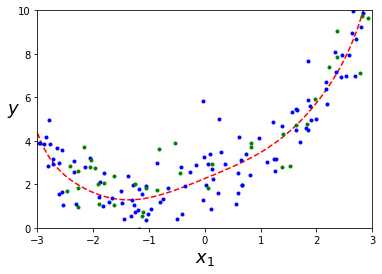

In [18]:
from sklearn.linear_model import Lasso
d = 10
model = Pipeline([
  ('poly', PolynomialFeatures(degree=d, include_bias=False)),
  ('scaler', StandardScaler()),
  ('Regressor', Lasso(alpha=0.001))])

model.fit(xtrain, ytrain)

# Crear nuevos puntos para dibujar puntos
xnew=np.linspace(-3, 3, 100).reshape(100, 1)
ynew = model.predict(xnew)
plt.plot(xnew,ynew,'--r')

# Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "g.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

model.fit(xtrain, ytrain)
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))